In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("GlobalLandTemperaturesByState.csv")


In [ ]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [ ]:
df.shape

(243796, 5)

In [ ]:
df.isnull().sum()

dt                                   0
AverageTemperature               10621
AverageTemperatureUncertainty    10621
State                                0
Country                              0
dtype: int64

In [ ]:
df = df.dropna(how= 'any' ,axis=0)

In [ ]:
df.shape

(235179, 5)

In [ ]:
df.rename(columns={'dt':'Date', 'AverageTemperature':'Avg_temp', 'AverageTemperatureUncertainty':'confidence_interval_temp'}, inplace=True)
df.head()

,Date,Avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '1987-05-01', '1987-06-01', '1987-07-01', '1987-08-01',
               '1987-09-01', '1987-10-01', '1987-11-01', '1987-12-01',
               '1988-01-01', '1988-02-01'],
              dtype='datetime64[ns]', name='Date', length=235179, freq=None)

In [ ]:
df.describe()

,Avg_temp,confidence_interval_temp
count,235179.000000,235179.000000
mean,10.591206,1.198240
std,13.830289,1.251772
min,-44.736000,0.036000
25%,1.638000,0.320000
50%,12.985000,0.637000
75%,22.058000,1.680000
max,36.339000,12.646000


In [ ]:
df['Year'] = df.index.year
df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [ ]:
df.describe()

,Avg_temp,confidence_interval_temp,Year
count,235179.000000,235179.000000,235179.000000
mean,10.591206,1.198240,1906.330204
std,13.830289,1.251772,65.304592
min,-44.736000,0.036000,1743.000000
25%,1.638000,0.320000,1856.000000
50%,12.985000,0.637000,1910.000000
75%,22.058000,1.680000,1961.000000
max,36.339000,12.646000,2013.000000


In [ ]:
latest_df = df.loc['1980':'2013']
latest_df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [ ]:
latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Canada,1.075977
Russia,2.309231
Australia,12.152389
United States,12.951063
China,14.591711
India,22.584420
Brazil,25.150331


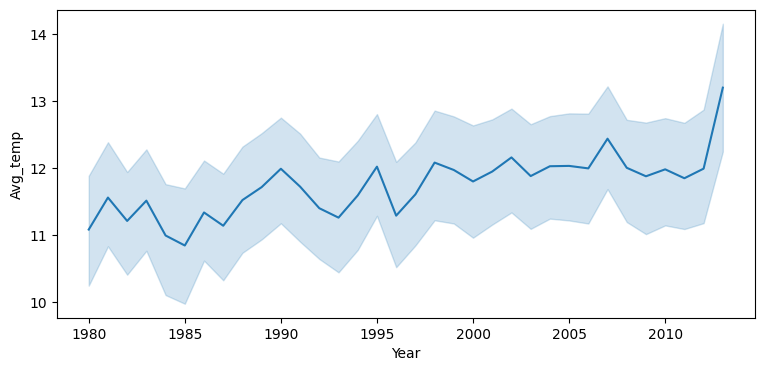

In [ ]:
plt.figure(figsize=(9, 4))
sns.lineplot(x = "Year", y= "Avg_temp", data=latest_df)
plt.show()

In [ ]:
resample_df = latest_df[['Avg_temp']].resample('A').mean()

In [ ]:
resample_df.head()

,Avg_temp
Date,
1980-12-31,11.081070
1981-12-31,11.558339
1982-12-31,11.209552
1983-12-31,11.512180
1984-12-31,10.992332


<function matplotlib.pyplot.legend(*args, **kwargs)>

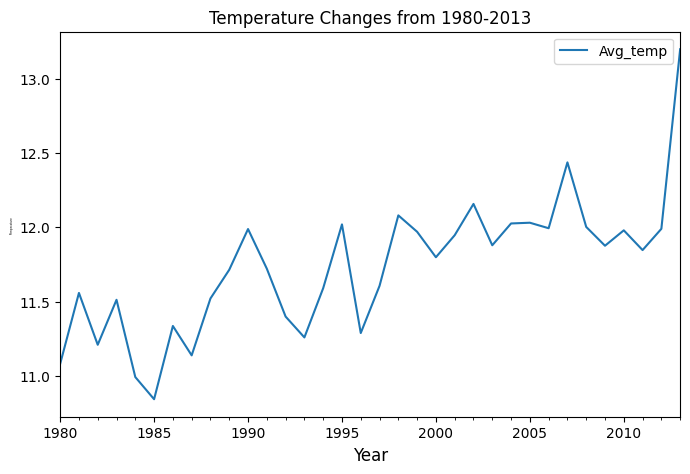

In [ ]:
resample_df.plot(title= 'Temperature Changes from 1980-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=2)
plt.xlabel('Year',fontsize=12)
plt.legend

In [ ]:
from statsmodels.tsa.stattools import adfuller

print('Dickey Fuller Test Results:')
test_df = adfuller(resample_df.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(test_df[0:4], index=['Test Statistic', 'p-value','Lags Used','Number of Obervations Used'])
for key, value in test_df[4].items():
  df_output['Critical Value (%s)'%key] = value
  print(df_output)

Dickey Fuller Test Results:
Test Statistic                -0.648352
p-value                        0.859678
Lags Used                     10.000000
Number of Obervations Used    23.000000
Critical Value (1%)           -3.752928
dtype: float64
Test Statistic                -0.648352
p-value                        0.859678
Lags Used                     10.000000
Number of Obervations Used    23.000000
Critical Value (1%)           -3.752928
Critical Value (5%)           -2.998500
dtype: float64
Test Statistic                -0.648352
p-value                        0.859678
Lags Used                     10.000000
Number of Obervations Used    23.000000
Critical Value (1%)           -3.752928
Critical Value (5%)           -2.998500
Critical Value (10%)          -2.638967
dtype: float64


In [ ]:
decomp = seasonal_decompose(resample_df, period=12)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

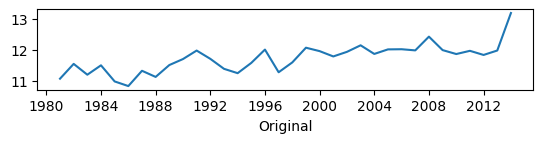

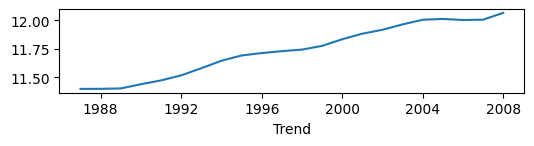

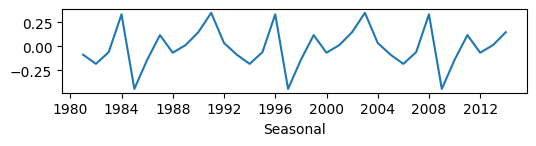

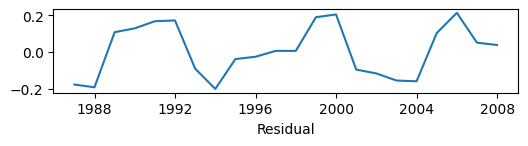

<Figure size 600x500 with 0 Axes>

In [ ]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()



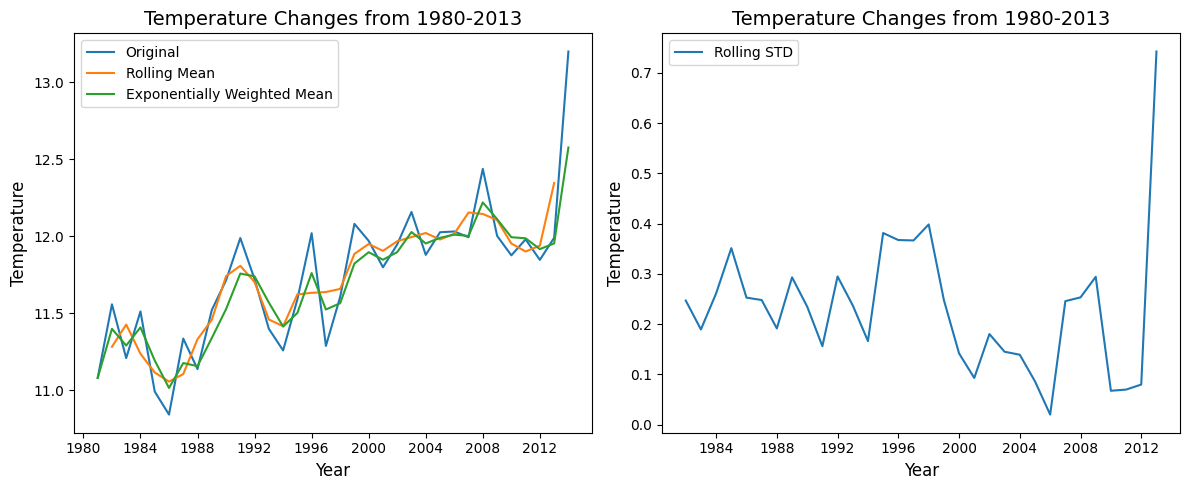

In [ ]:
rol_mean = resample_df.rolling(window=3, center=True).mean()
ewm = resample_df.ewm(span=3).mean()
rol_std = resample_df.rolling(window=3, center=True).std()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm,label='Exponentially Weighted Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label='Rolling STD')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
rol_mean.dropna (inplace=True)
ewm.dropna (inplace=True)

print ('Dickey-Fuller Test for the Rolling Mean:')

df_test = adfuller (rol_mean.iloc[:,0].values, autolag='AIC')
df_output = pd.Series (df_test[0:4], index= ['Test Statistic', 'p-value', 'Lags Used','Number of Observations Used'])
for key, value in df_test[4].items():
  df_output['Critical Value (%s) '%key] = value

print (df_output)
print ('')
print ('Dickey-Fuller Test for the Exponentially weighted Mean:')

df_test = adfuller (ewm.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value','Lags Used','Number of Observations Used'])
for key, value in df_test[4].items():
  df_output['Critical Value (%s) '%key] = value
  print (df_output)


Dickey-Fuller Test for the Rolling Mean:
Test Statistic                 -0.678977
p-value                         0.852120
Lags Used                       8.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64

Dickey-Fuller Test for the Exponentially weighted Mean:
Test Statistic                 -0.755850
p-value                         0.831748
Lags Used                      10.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
dtype: float64
Test Statistic                 -0.755850
p-value                         0.831748
Lags Used                      10.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
dtype: float64
Test Statistic                 -0.755850
p-value                         0.831748
Lags Used                      10.000

In [ ]:
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_temp
Date,
1981-12-31,0.275352
1982-12-31,-0.217139
1983-12-31,0.274158
1984-12-31,-0.123583
1985-12-31,-0.213973


In [ ]:
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Avg_temp
Date,
1980-12-31,0.000000
1981-12-31,0.159090
1982-12-31,-0.081299
1983-12-31,0.103287
1984-12-31,-0.201562


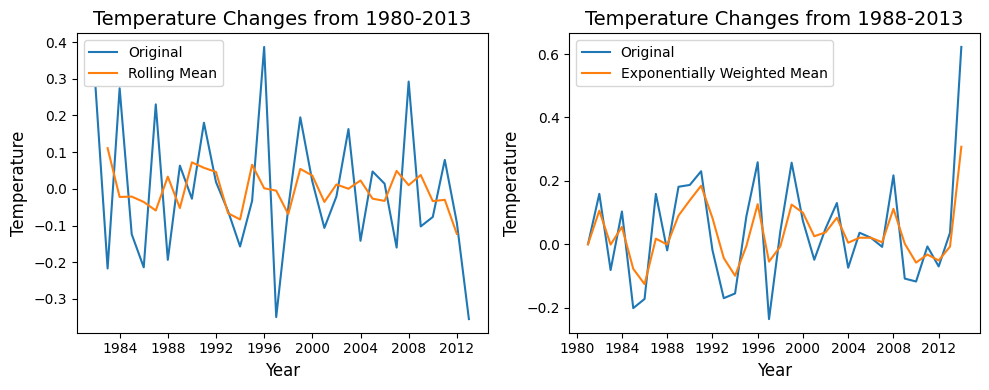

In [ ]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3, center=True).mean()

df_ewm_diff = diff_ewm.ewm(span=3).mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.plot(diff_rol_mean, label='Original')
ax1.plot(df_rol_mean_diff, label= 'Rolling Mean')
ax1.set_title('Temperature Changes from 1980-2013', fontsize=14)
ax1.set_ylabel('Temperature', fontsize=12)
ax1.set_xlabel('Year', fontsize=12)
ax1.legend()

ax2.plot(diff_ewm, label='Original')
ax2.plot(df_ewm_diff,label='Exponentially Weighted Mean')
ax2.set_title('Temperature Changes from 1988-2013', fontsize=14)
ax2.set_ylabel('Temperature', fontsize=12)
ax2.set_xlabel('Year', fontsize=12)
ax2.legend()
plt.tight_layout()


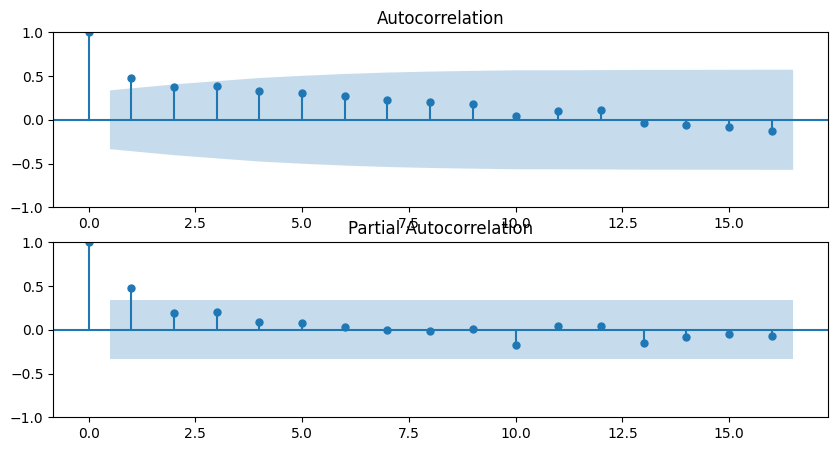

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df, ax=pyplot.gca())
pyplot.show()